In [1]:
from keras.models import load_model
from PIL import Image
import numpy as np
import cv2


%matplotlib inline 
from matplotlib import pyplot as plt 
import pylab 
pylab.rcParams['figure.figsize'] = (10.0, 8.0)


## Load

In [2]:
export_dir=r"D:\FPT\CN4 Spring24\CPV301\dl face detection\age_data\output\age_model_pretrained.h5"
age_model = load_model(export_dir)

# summarize model.
age_model.summary()

c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 99, 99, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 48, 48, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 23, 23, 128)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 10, 10, 256)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 132)            │        33,924 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           931 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,697 (1.61 MB)

 Trainable params: 422,695 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [12]:
age_ranges = ['1-2', '3-9', '10-20', '21-27', '28-45', '46-65', '66-116']


## Loading Test Images

In [26]:
# img_path = "./1.4_test_input/images/priyanka_chopra.jpg"
img_path = r"D:\FPT\CN4 Spring24\CPV301\dl face detection\age_data\output\z5212987016159_46950847b7d0e302cf8d75f9b4417217.jpg"
# img_path =r"D:\FPT\CN4 Spring24\CPV301\dl face detection\age_data\output\64e69f71607b05d852db97ae_CPO.jpeg"

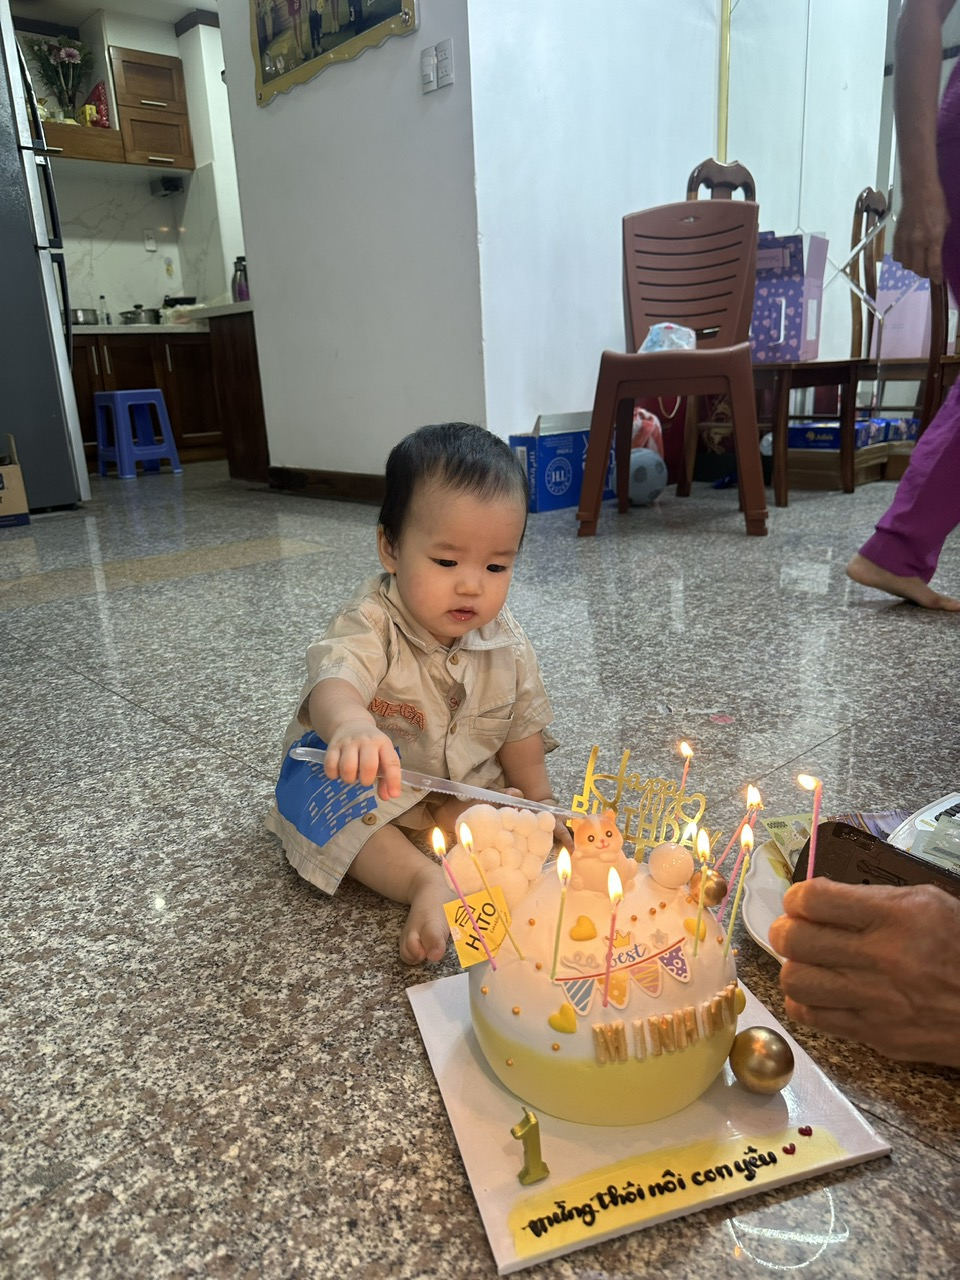

In [27]:
from IPython.display import Image 
pil_img = Image(filename=img_path)
display(pil_img)

## Results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

1-2


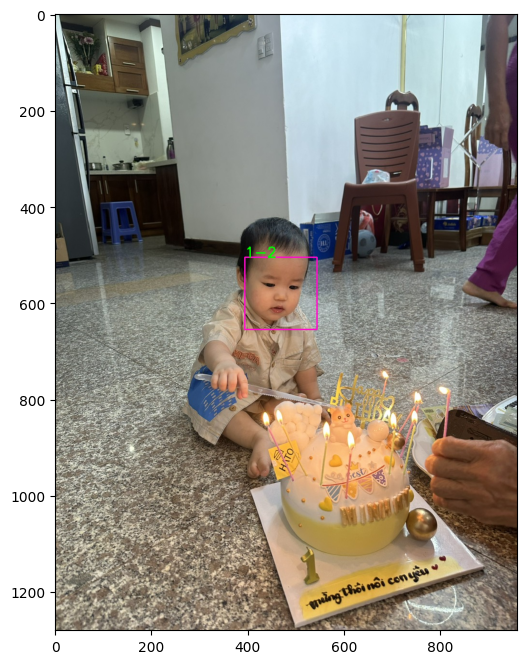

In [28]:
test_image = cv2.imread(img_path)
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(r"D:\FPT\CN4 Spring24\CPV301\dl face detection\age_data\output\haarcascade_frontalface_default.xml")
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

i = 0

for (x,y,w,h) in faces:
  i = i+1
  cv2.rectangle(test_image,(x,y),(x+w,y+h),(203,12,255),2)

  img_gray=gray[y:y+h,x:x+w]
  age_image=cv2.resize(img_gray, (200, 200), interpolation = cv2.INTER_AREA)
  age_input = age_image.reshape(-1, 200, 200, 1)
  output_age = age_ranges[np.argmax(age_model.predict(age_input))]
  print()


  output_str = output_age 
  print(output_str)
  
  col = (0,255,0)

  cv2.putText(test_image, output_str,(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,col,2)

plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))